# Various Routines to Harvest CRIM Metadata from Production Server

In [1]:
import requests
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plot
import altair as alt # visualization library; see https://altair-viz.github.io/

In [2]:
print(pd.__version__)

1.1.5


In [3]:
import requests
import pandas as pd 
data = requests.get('http://crimproject.org/data/relationships/').json()
#df = pd.DataFrame(data)
df = pd.json_normalize(data)
df.head()

,url,id,relationship_type,musical_type,rt_q,rt_q_x,rt_q_monnayage,rt_tm,rt_tm_snd,rt_tm_minv,...,model_observation.piece.url,model_observation.piece.piece_id,model_observation.piece.full_title,model_observation.ema,derivative_observation.url,derivative_observation.id,derivative_observation.piece.url,derivative_observation.piece.piece_id,derivative_observation.piece.full_title,derivative_observation.ema
0,http://crimproject.org/data/relationships/1/,1,Quotation,Fuga,True,True,False,False,False,False,...,http://crimproject.org/data/pieces/CRIM_Model_...,CRIM_Model_0011,Tota pulchra es,"1-6/1,1,1-2,1-2,2,2/@1,@1-3,@1-3+@1,@1-3+@1-3,...",http://crimproject.org/data/observations/2/,2,http://crimproject.org/data/pieces/CRIM_Mass_0...,CRIM_Mass_0009_3,Missa Tota pulchra es: Credo,"1-6/1,1,1+3,1+3,3,3/@1-4,@1-3,@1-3+@1-4,@1-3+@..."
1,http://crimproject.org/data/relationships/2/,2,Non-mechanical transformation,Fuga,False,False,False,False,False,False,...,http://crimproject.org/data/pieces/CRIM_Model_...,CRIM_Model_0011,Tota pulchra es,"5-9/1,1,1-2,2,2/@3,@1-4,@1-2+@4,@1-4,@1-2",http://crimproject.org/data/observations/4/,4,http://crimproject.org/data/pieces/CRIM_Mass_0...,CRIM_Mass_0009_3,Missa Tota pulchra es: Credo,"5-8/1,1+4,1+4,4/@3,@1-4+@4,@1+@1-3,@1"
2,http://crimproject.org/data/relationships/3/,3,Non-mechanical transformation,Fuga,False,False,False,False,False,False,...,http://crimproject.org/data/pieces/CRIM_Model_...,CRIM_Model_0011,Tota pulchra es,"5-9,14-18/1,1,1-2,1-2,1-2,3,3,3-4,3-4,3-4/@3,@...",http://crimproject.org/data/observations/6/,6,http://crimproject.org/data/pieces/CRIM_Mass_0...,CRIM_Mass_0009_5,Missa Tota pulchra es: Agnus Dei,"9-12/3-4,2-4,2,2/@4+@1-4,@4+@1-4+@1-3,@1-3,@1"
3,http://crimproject.org/data/relationships/4/,4,Non-mechanical transformation,Fuga,False,False,False,False,False,False,...,http://crimproject.org/data/pieces/CRIM_Model_...,CRIM_Model_0011,Tota pulchra es,"5-9/1,1,1-2,2,2/@3,@1-4,@1-2+@4,@1-4,@1-2",http://crimproject.org/data/observations/8/,8,http://crimproject.org/data/pieces/CRIM_Mass_0...,CRIM_Mass_0009_3,Missa Tota pulchra es: Credo,"5-10/1,1+4,1+4,1+4,1+4,4/@3,@1-4+@4,@1-4.5+@1-..."
4,http://crimproject.org/data/relationships/5/,5,Quotation,Soggetto,True,True,False,False,False,False,...,http://crimproject.org/data/pieces/CRIM_Model_...,CRIM_Model_0018,Baisez moy,"1-38/6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6...",http://crimproject.org/data/observations/10/,10,http://crimproject.org/data/pieces/CRIM_Mass_0...,CRIM_Mass_0017_4,Missa Baisez moy: Sanctus,"1-41/5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5..."


In [6]:
#df[['musical_type', 'piece.piece_id']] 
counts = pd.DataFrame(df['observer.name'].value_counts())
counts.head()

,observer.name
Ian Lorenz,677
Scott Troyer,280
Raphaëlle Rouzic,214
Damien Bonnec,208
Alessandra Ignesti,203


In [7]:
select_data = df[["observer.name", "piece.full_title", "musical_type"]]
counts = pd.DataFrame(select_data['observer.name', 'piece.full_title'].value_counts())
# Summary stacked bar chart listed by cadence tone

chartA = alt.Chart(counts).mark_bar().encode(
    alt.X("observer.name"),
    y='count()',
    #color='cadence_kind'
).properties(
    width=600,
    height=300,
    title='Summary of Musical Types'
)

chartA


KeyError: "['piece.full_title'] not in index"

In [16]:
#df[['musical_type', 'piece.piece_id']] 
counts = pd.DataFrame(df['musical_type'].value_counts())
counts.dtypes

musical_type    int64
dtype: object

In [9]:
search = df[df['musical_type'].str.contains(",")]
out = pd.DataFrame(search)
out

,url,id,relationship_type,musical_type,rt_q,rt_q_x,rt_q_monnayage,rt_tm,rt_tm_snd,rt_tm_minv,...,model_observation.piece.url,model_observation.piece.piece_id,model_observation.piece.full_title,model_observation.ema,derivative_observation.url,derivative_observation.id,derivative_observation.piece.url,derivative_observation.piece.piece_id,derivative_observation.piece.full_title,derivative_observation.ema
55,http://crimproject.org/data/relationships/56/,56,Non-mechanical transformation,"Fuga, Interval patterns",False,False,False,False,False,False,...,http://crimproject.org/data/pieces/CRIM_Model_...,CRIM_Model_0017,Benedicta es,"118-122/1-2,1-2,1-2,1-2,1-2/@1-3+@1-3,@1-4+@1-...",http://crimproject.org/data/observations/112/,112,http://crimproject.org/data/pieces/CRIM_Mass_0...,CRIM_Mass_0015_3,Missa Benedicta es: Credo,"146-153/1,1-2,1-2,1-2+4,1-4,3-4,3-4,3-4/@3-4,@..."
64,http://crimproject.org/data/relationships/65/,65,Non-mechanical transformation,"Imitative duo, Non-imitative duo",False,False,False,False,False,False,...,http://crimproject.org/data/pieces/CRIM_Model_...,CRIM_Model_0017,Benedicta es,"154-162/1-2+6,1-2+6,1-2+6,1-2,1-5,3-5,3-5,3-4,...",http://crimproject.org/data/observations/130/,130,http://crimproject.org/data/pieces/CRIM_Mass_0...,CRIM_Mass_0015_3,Missa Benedicta es: Credo,"207-216/3+6,3-4+6,3-4+6,2-3+6,1-4+6,1+4,1+4,1+..."
70,http://crimproject.org/data/relationships/71/,71,Quotation,"Fuga, Non-imitative duo",True,True,False,False,False,False,...,http://crimproject.org/data/pieces/CRIM_Model_...,CRIM_Model_0020,Susanne un jour,"1-11/1-2,1-2+4,1-5,1-5,1-5,1-5,1-5,1-5,1-5,1-4...",http://crimproject.org/data/observations/142/,142,http://crimproject.org/data/pieces/CRIM_Mass_0...,CRIM_Mass_0020_1,Missa Susanne un jour: Kyrie,"1-11/1-2,1-2+4,1-5,1-5,1-5,1-5,1-5,1-5,1-5,1-5..."
92,http://crimproject.org/data/relationships/93/,93,Non-mechanical transformation,"Imitative duo, Non-imitative duo",False,False,False,False,False,False,...,http://crimproject.org/data/pieces/CRIM_Model_...,CRIM_Model_0017,Benedicta es,"154-162/1-2+6,1-2+6,1-2+6,1-2,1-5,3-5,3-5,3-4,...",http://crimproject.org/data/observations/186/,186,http://crimproject.org/data/pieces/CRIM_Mass_0...,CRIM_Mass_0015_4,Missa Benedicta es: Sanctus,"105-111,119-123/2+5,2+5,2-3+5,2-3+5-6,3+5-6,3+..."
116,http://crimproject.org/data/relationships/117/,117,Non-mechanical transformation,"Fuga, Interval patterns",False,False,False,False,False,False,...,http://crimproject.org/data/pieces/CRIM_Model_...,CRIM_Model_0009,Je suis déshéritée,"13-17/3,3,1+3-4,1+4,1/@2-4,@1-4,@2-4+@1+@1-4,@...",http://crimproject.org/data/observations/234/,234,http://crimproject.org/data/pieces/CRIM_Mass_0...,CRIM_Mass_0007_1,Missa Je suis déshéritée: Kyrie,"15-19/1,1,1+3-4,3-4,3/@2-4,@1-4,@1+@2-4+@1-4,@..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,http://crimproject.org/data/relationships/2585/,2585,Non-mechanical transformation,"Homorhythm, Interval patterns",False,False,False,False,False,False,...,http://crimproject.org/data/pieces/CRIM_Model_...,CRIM_Model_0020,Susanne un jour,"50-53/1-2+4,1-2+4,1-2+4,1-2+4/@4+@4+@4,@1-4+@1...",http://crimproject.org/data/observations/1174/,1174,http://crimproject.org/data/pieces/CRIM_Mass_0...,CRIM_Mass_0020_3,Missa Susanne un jour: Credo,"196-200/3,1-3,1-3,1-3,1-3/@4,@2-4+@1-4+@1-4,@1..."
2565,http://crimproject.org/data/relationships/2587/,2587,Quotation,"Non-imitative duo, Cadence",True,True,False,False,False,False,...,http://crimproject.org/data/pieces/CRIM_Model_...,CRIM_Model_0018,Baisez moy,"1-8/2+4,1-4,1-4,1-4,1-4,1-4,1-3,1/@3+@1,@3+@1-...",http://crimproject.org/data/observations/1178/,1178,http://crimproject.org/data/pieces/CRIM_Mass_0...,CRIM_Mass_0017_1,Missa Baisez moy: Kyrie,"1-7/2+4,1-4,1-4,1-4,1-4,1-4,1-3/@3+@1,@3+@1-3+..."
2566,http://crimproject.org/data/relationships/2588/,2588,Non-mechanical transformation,"Fuga, Interval patterns",False,False,False,False,False,False,...,http://cri

In [17]:
grouped.plot(kind="bar")

NameError: name 'grouped' is not defined

In [12]:
#df[['musical_type', 'piece.piece_id']] 
counts = pd.DataFrame(df['observer.name'].value_counts())
counts

,observer.name
Ian Lorenz,1353
Scott Troyer,560
Raphaëlle Rouzic,429
Damien Bonnec,418
Alessandra Ignesti,406
Jon Oddie,402
Alexis Risler,384
Peter Schubert,260
Manon Manfredi,256
Anne Nautré,210


In [14]:
counts_obs = pd.DataFrame(df['observer.name'].value_counts())
out = pd.DataFrame(counts_obs)
out.head()

,observer.name
Ian Lorenz,1353
Scott Troyer,560
Raphaëlle Rouzic,429
Damien Bonnec,418
Alessandra Ignesti,406


In [10]:
counts_types = pd.DataFrame(df['musical_type'].value_counts())
counts_types

,musical_type
Fuga,743
Soggetto,586
Cadence,283
Imitative duo,181
Periodic entry,133
...,...
"Fuga, Non-imitative duo, Interval patterns",1
"Soggetto, Non-imitative duo",1
"Cantus firmus, Fuga, Non-imitative duo",1
"Contrapuntal duo, Homorhythm, Interval patterns",1


<Figure size 720x720 with 0 Axes>

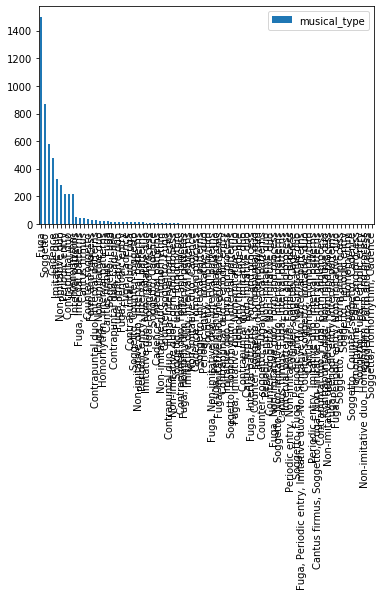

In [9]:
plot.figure(figsize=(10, 10))
counts_types.plot(kind="bar")

In [85]:
Filter_by_Type = df["musical_type"].str.contains("Fuga")
Filter_by_Type
#df2 = pd.DataFrame(Filter_by_Type)
#df2

0        True
1        True
2        True
3        True
4        True
        ...  
5235    False
5236    False
5237    False
5238    False
5239    False
Name: musical_type, Length: 5240, dtype: bool

In [14]:
# Summary stacked bar chart listed by cadence tone

chartA = alt.Chart(counts).mark_bar().encode(
    alt.X("observer.name"),
    y='count()',
    #color='cadence_kind'
).properties(
    width=600,
    height=300,
    title='Summary of Musical Types'
)

chartA

alt.Chart(...)

In [ ]:
# brief data with request, then a loop to capture data for each observation

data = requests.get('http://crimproject.org/data/observations/brief/').json()
for ob in data:
    print(ob['id'], ob['url'],ob['observer'], ob['musical_type'],ob['piece'],ob[ 'ema']) 
    break
 

In [11]:
# nested data with request, with for loop for each observation
# but how to get nested data?
data = requests.get('http://crimproject.org/data/observations/').json()
for ob in data:
    print(ob['id'], ob['url'],ob['observer'], ob['musical_type'],ob['piece'],ob[ 'ema']) 
    break

1 http://crimproject.org/data/observations/1/ {'url': 'http://crimproject.org/data/people/CRIM_Person_1012/', 'name': 'Ian Lorenz'} Fuga {'url': 'http://crimproject.org/data/pieces/CRIM_Model_0011/', 'piece_id': 'CRIM_Model_0011', 'full_title': 'Tota pulchra es', 'mass': None} 1-6/1,1,1-2,1-2,2,2/@1,@1-3,@1-3+@1,@1-3+@1-3,@1-3,@1


In [4]:

data = requests.get('http://crimproject.org/data/observations/').json()
for ob in data:
    print (data[0]['piece']['piece_id'])
    #print (data[0]['observer']['name'])
    break

CRIM_Model_0011


In [8]:
crim_df = pd.read_json("https://crimproject.org/data/observations/")
crim_df.columns

Index(['url', 'id', 'observer', 'piece', 'ema', 'musical_type', 'mt_cf',
       'mt_cf_voices', 'mt_cf_dur', 'mt_cf_mel', 'mt_sog', 'mt_sog_voices',
       'mt_sog_dur', 'mt_sog_mel', 'mt_sog_ostinato', 'mt_sog_periodic',
       'mt_csog', 'mt_csog_voices', 'mt_csog_dur', 'mt_csog_mel', 'mt_cd',
       'mt_cd_voices', 'mt_fg', 'mt_fg_voices', 'mt_fg_int', 'mt_fg_tint',
       'mt_fg_periodic', 'mt_fg_strict', 'mt_fg_flexed', 'mt_fg_sequential',
       'mt_fg_inverted', 'mt_fg_retrograde', 'mt_pe', 'mt_pe_voices',
       'mt_pe_int', 'mt_pe_tint', 'mt_pe_strict', 'mt_pe_flexed', 'mt_pe_flt',
       'mt_pe_sequential', 'mt_pe_added', 'mt_pe_invertible', 'mt_id',
       'mt_id_voices', 'mt_id_int', 'mt_id_tint', 'mt_id_strict',
       'mt_id_flexed', 'mt_id_flt', 'mt_id_invertible', 'mt_nid',
       'mt_nid_voices', 'mt_nid_int', 'mt_nid_tint', 'mt_nid_strict',
       'mt_nid_flexed', 'mt_nid_flt', 'mt_nid_sequential', 'mt_nid_invertible',
       'mt_hr', 'mt_hr_voices', 'mt_hr_simple', '

In [ ]:
# Now focus on the 'piece' key within this list
# since this is NESTED json, with more details of the piece_id, title, etc.
# normalize allows to access them
piece_details = json_normalize(crim_df.piece)
piece_details.keys()

In [9]:
# normalizing as separate DF
piece_details_df = pd.DataFrame(json_normalize(crim_df.piece))
piece_details_df

,url,piece_id,full_title,mass
0,https://crimproject.org/data/pieces/CRIM_Model...,CRIM_Model_0011,Tota pulchra es,None
1,https://crimproject.org/data/pieces/CRIM_Mass_...,CRIM_Mass_0009_3,Missa Tota pulchra es: Credo,CRIM_Mass_0009
2,https://crimproject.org/data/pieces/CRIM_Model...,CRIM_Model_0011,Tota pulchra es,None
3,https://crimproject.org/data/pieces/CRIM_Mass_...,CRIM_Mass_0009_3,Missa Tota pulchra es: Credo,CRIM_Mass_0009
4,https://crimproject.org/data/pieces/CRIM_Model...,CRIM_Model_0011,Tota pulchra es,None
...,...,...,...,...
5235,https://crimproject.org/data/pieces/CRIM_Model...,CRIM_Model_0006,Missa IX (Cum iubilo) - Sanctus,None
5236,https://crimproject.org/data/pieces/CRIM_Model...,CRIM_Model_0003,Missa IX (Cum iubilo) - Kyrie,None
5237,https://crimproject.org/data/pieces/CRIM_Model...,CRIM_Model_0004,Missa IX (Cum iubilo) - Gloria,None
5238,https://crimproject.org/data/pieces/CRIM_Model...,CRIM_Model_0001,Vidi speciosam,None


In [ ]:
# now counting the instances of any column in this 'piece' df
counts = pd.DataFrame(piece_details_df["piece_id"].value_counts())
counts

In [ ]:
value_list = ["213"]
boolean_series = counts.piece_id.isin(value_list)
filtered_df = counts[boolean_series]
filtered_df

In [ ]:
grouped2 = pd.DataFrame(piece_details_df.groupby(['piece_id']))
grouped2.count()
grouped2

value_list = ["Mass_0002"]
boolean_series = df.piece_id.isin(value_list)
filtered_df = df[boolean_series]
filtered_df


In [ ]:
# Summary stacked bar chart listed by cadence tone

chartA = alt.Chart(grouped2).mark_bar().encode(
    alt.X("mass"),
    y='count()',
    #color='cadence_kind'
).properties(
    width=600,
    height=300,
    title='Summary of Masses'
)

chartA

In [ ]:
data = crim_df["piece"]
data

In [ ]:
# Get the nested data in the dataframe.
# For example the "piece_id" that's inside the "piece"
crim_piece = crim_df["piece"]
piece_info = crim_piece.apply(pd.Series)
piece_info


In [ ]:
#piece_details = pd.DataFrame(piece_info["piece_id"])
df = pd.DataFrame(piece_details["piece_id"].value_counts())
df

In [ ]:
pd.DataFrame(piece_details)

In [ ]:
grouped = piece_details.groupby(['mass'])
grouped.count()


In [ ]:
#Filter_by_Piece = piece_info["piece_id"].str.contains("9")
Filter_by_Piece = (piece_details["piece_id"]=="CRIM_Model_0011")
pd.DataFrame(Filter_by_Piece)


In [ ]:
# Summary stacked bar chart listed by cadence tone

chartA = alt.Chart(grouped).mark_bar().encode(
    alt.X("mass"),
    y='count()',
    #color='cadence_kind'
).properties(
    width=600,
    height=300,
    title='Summary of Masses'
)

chartA

In [ ]:
grouped2 = piece_info.groupby(['full_title'])
grouped2.count()

In [ ]:
counts = crim_df['piece'].value_counts()
pd.DataFrame(counts)

It has a data type:  string

In [ ]:
Obs_mei[0]

In [ ]:
Obs_json["piece"]["mei_links"][0]

In [ ]:
Obs_json["ema"]

In [ ]:
def get_ema_for_observation_id(obs_id):
    # get Obs_url
    url = "https://crimproject.org/data/observations/{}/".format(obs_id)
    return url

In [ ]:
def get_ema_for_observation_id(obs_id):
    # get Obs_ema
    my_ema_mei_dictionary = dict()
    url = "https://crimproject.org/data/observations/{}/".format(obs_id)
    response = requests.get(url)
    Obs_json = response.json()
    
    # Obs_ema = Obs_json["ema"]
    
    my_ema_mei_dictionary["id"]=Obs_json["id"]
    my_ema_mei_dictionary["musical type"]=Obs_json["musical_type"]
    my_ema_mei_dictionary["int"]=Obs_json["mt_fg_int"]
    my_ema_mei_dictionary["tint"]=Obs_json["mt_fg_tint"]
    my_ema_mei_dictionary["ema"]=Obs_json["ema"]
    my_ema_mei_dictionary["mei"]=Obs_json["piece"]["mei_links"][0]
    my_ema_mei_dictionary["pdf"]=Obs_json["piece"]["pdf_links"][0]
   
    
    # Obs_piece = Obs_json["piece"]
    # Obs_mei = Obs_piece["mei_links"]
    
    print(f'Got: {obs_id}')
    
    # return {"ema":Obs_ema,"mei":Obs_mei}
    
    return my_ema_mei_dictionary


Now we get a _particular_ observation.

In [ ]:
#  two "==" means check for equality
# for 'contains' use str.contains("letter")
# can also use regex in this (for EMA range)
# Filter_by_Type = (DF_output["musical type"]=="Fuga") & (DF_output["id"]==8)
Filter_by_Type = DF_output["musical type"].str.contains("Fuga")

# 

In [ ]:
DF_output[Filter_by_Type]